In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import plotly.express as px

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
pd.crosstab(df['sex'], df['survived'], margins='True')

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:xlabel='sex', ylabel='count'>

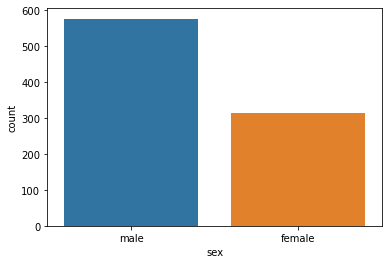

In [4]:
sns.countplot(data=df, x='sex')

In [18]:
df_agg = df.groupby(['sex', 'survived'], as_index=False)[['embark_town']].count()
df_agg.columns = ['sex', 'survived', 'no_of_passengers']
df_agg['survived'] = df_agg.survived.astype('object')
px.bar(df_agg, x='sex', y='no_of_passengers', color='survived')

<AxesSubplot:xlabel='age', ylabel='embark_town'>

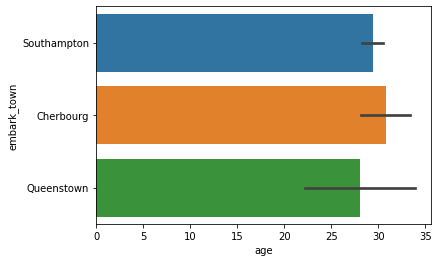

In [19]:
sns.barplot(data=df, x='age', y='embark_town')

<AxesSubplot:>

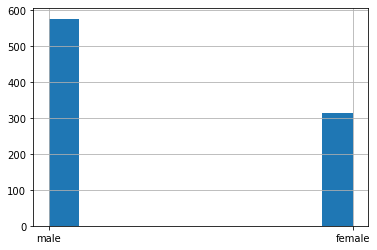

In [7]:
df.sex.hist()

<AxesSubplot:xlabel='embark_town', ylabel='Count'>

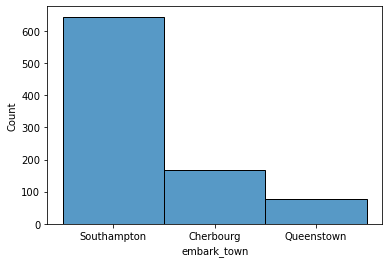

In [25]:
sns.histplot(data=df[~df.embark_town.isna()], x='embark_town')

<AxesSubplot:xlabel='sex', ylabel='Density'>

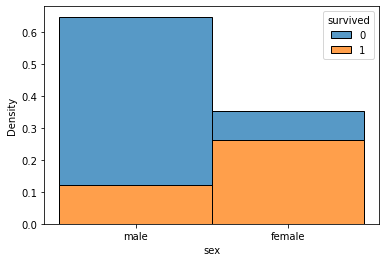

In [33]:
sns.histplot(data=df, x='sex', stat='density', hue='survived', multiple='stack')

In [48]:
px.histogram(df, x='embark_town', 
             histnorm='density', 
             color='class', 
             barnorm='fraction', 
             category_orders={'class': ['Third', 'Second', 'First']})

# Barplots containing information about mulitple attributes

<AxesSubplot:xlabel='embark_town', ylabel='count'>

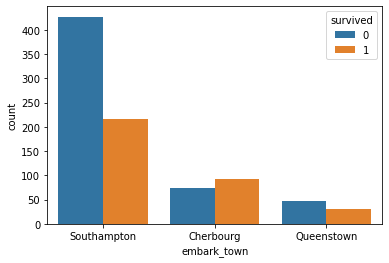

In [35]:
sns.countplot(data=df, x='embark_town', hue='survived')

<AxesSubplot:xlabel='sex', ylabel='Density'>

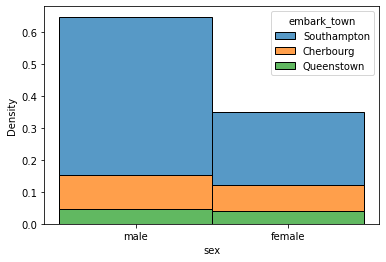

In [38]:
sns.histplot(data=df, x='sex', hue='embark_town', stat='density', multiple='stack')

In [51]:
px.histogram(df,
            x='sex',
            color='survived',
            facet_col='class',
             barnorm='fraction',
            category_orders={'class': ['Third', 'Second', 'First']})

# Pie Chart

In [63]:
df_agg = df[df['class']=='First'].groupby('sex', as_index=False)[['survived']].count()
df_agg.columns = ['sex', 'number_of_passengers']

px.pie(df_agg, 
      values='number_of_passengers',
      names='sex',
      title='First')

In [66]:
px.sunburst(df, 
           path=['class', 'sex', 'survived']
           )

# Treemap

In [79]:
px.treemap(df[~df.embark_town.isna()],
          path=['class', 'embark_town'],
          color='fare')

In [81]:
# careful: n/a-values
px.treemap(df[(~df.age.isna()) & (~df.embark_town.isna())], 
           path=['embark_town', 'sex', 'class', 'survived'],
           color='fare',
           title='Share of gender/class per survived/not-survived',           
          )

In [80]:
df.groupby(['class', 'embark_town'])[['fare']].mean().round()

fare
class  embark_town       
First  Cherbourg    105.0
       Queenstown    90.0
       Southampton   70.0
Second Cherbourg     25.0
       Queenstown    12.0
       Southampton   20.0
Third  Cherbourg     11.0
       Queenstown    11.0
       Southampton   15.0

In [72]:
df[(df.sex=='female') & (df['class']=='First')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [75]:
df.groupby('embark_town')[['fare']].mean().round()

,fare
embark_town,
Cherbourg,60.0
Queenstown,13.0
Southampton,27.0


In [93]:
df['age_group'] = pd.cut(df.age, bins=5)
df['age_group'] = df.age_group.astype('str')

In [111]:
px.histogram(df, x='age', color='survived', nbins=10)

In [99]:
df['age_group'].unique()

array(['(16.336, 32.252]', '(32.252, 48.168]', nan, '(48.168, 64.084]',
       '(0.34, 16.336]', '(64.084, 80.0]'], dtype=object)

In [101]:
px.histogram(df, x='age_group', color='survived', barnorm='fraction',
             category_orders={'age_group': ['(0.34, 16.336]', '(16.336, 32.252]', '(32.252, 48.168]', '(48.168, 64.084]', '(64.084, 80.0]']})

In [86]:
print(df.age.min())
print(df.age.max())

0.42
80.0


In [116]:
df_viz = df[~df.fare.isna()].copy()
df_viz['fare_category'] = pd.cut(df_viz.fare, 
                                 bins=[df_viz.fare.min(), 25, 50, 100, df_viz.fare.max()], 
                                 labels=['cheap', 'medium', 'expensive', 'very expensive'])

In [125]:
df_viz = df[~df.fare.isna()].copy()
df_viz['fare_category'] = pd.cut(df_viz.fare, bins=[df_viz.fare.min(), 25, 50, 100, df_viz.fare.max()], labels=['cheap', 'medium', 'expensive', 'very expensive'])

px.parallel_categories(df_viz, dimensions=['class', 'embark_town'], color='survived')

In [126]:
df = sns.load_dataset('iris')

In [132]:
px.histogram(df, x='petal_length', color='species', nbins=50)